In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 

In [6]:
pd.set_option('display.max_columns', None) #so the maximum number of columns are displayed in .head()

In [7]:
#Loading the dataset on a datafdrame data
data = pd.read_csv("Android_Malware.csv")
data = data.drop(['Unnamed: 0'], axis = 1)

/var/folders/5z/1dd847w96pb2t3c9_r9mc_y40000gn/T/ipykernel_52891/2046316586.py:2: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Android_Malware.csv")


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       355629 non-null  object 
 1    Source IP                    355630 non-null  object 
 2    Source Port                  355630 non-null  int64  
 3    Destination IP               355630 non-null  object 
 4    Destination Port             355630 non-null  float64
 5    Protocol                     355630 non-null  float64
 6    Timestamp                    355630 non-null  object 
 7    Flow Duration                355630 non-null  int64  
 8    Total Fwd Packets            355630 non-null  int64  
 9    Total Backward Packets       355630 non-null  int64  
 10  Total Length of Fwd Packets   355630 non-null  float64
 11   Total Length of Bwd Packets  355630 non-null  float64
 12   Fwd Packet Length Max        355630 non-nul

In [8]:
data.columns = [i.strip() for i in data.columns] # stripping all the whitespaces from the column names

In [9]:
#Dropping all the missing values from data
print(data.isnull().sum())
data = data.dropna()

Flow ID             1
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           4
Idle Std            4
Idle Max            4
Idle Min            4
Label               0
Length: 85, dtype: int64


In [10]:
#Dropping Android_Adware and Android_Scareware
data['Label'].unique()
labels_to_remove = ['Android_Adware', 'Android_Scareware']
data = data[~data['Label'].isin(labels_to_remove)]
for column in data.columns:
    if 'Timestamp' in column:
        data = data.drop(column, axis = 1)

In [11]:
for column in data.columns:
    if len(data[column].unique()) > 1:
        count = 0
        if str(data[column].unique()[0]) != str(data[column].unique()[1]):
                count += 1
        if (count == 0):
            print('Same Unique Values : ',column)
            data = data.drop(column, axis = 1)
    elif len(data[column].unique()) == 1:
        print('Only 1 value : ', column)
        data = data.drop(column, axis = 1)

Only 1 value :  Bwd PSH Flags
Only 1 value :  Fwd URG Flags
Only 1 value :  Bwd URG Flags
Only 1 value :  RST Flag Count
Same Unique Values :  CWE Flag Count
Only 1 value :  ECE Flag Count
Same Unique Values :  Fwd Avg Bytes/Bulk
Only 1 value :  Fwd Avg Packets/Bulk
Only 1 value :  Fwd Avg Bulk Rate
Only 1 value :  Bwd Avg Bytes/Bulk
Only 1 value :  Bwd Avg Packets/Bulk
Only 1 value :  Bwd Avg Bulk Rate


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91102 entries, 264525 to 355629
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      91102 non-null  object 
 1   Source IP                    91102 non-null  object 
 2   Source Port                  91102 non-null  int64  
 3   Destination IP               91102 non-null  object 
 4   Destination Port             91102 non-null  float64
 5   Protocol                     91102 non-null  float64
 6   Flow Duration                91102 non-null  int64  
 7   Total Fwd Packets            91102 non-null  int64  
 8   Total Backward Packets       91102 non-null  int64  
 9   Total Length of Fwd Packets  91102 non-null  float64
 10  Total Length of Bwd Packets  91102 non-null  float64
 11  Fwd Packet Length Max        91102 non-null  float64
 12  Fwd Packet Length Min        91102 non-null  float64
 13  Fwd Packet Leng

In [23]:
data['Down/Up Ratio']  = [float(x) for x in data['Down/Up Ratio'].values]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91102 entries, 264525 to 355629
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      91102 non-null  object 
 1   Source IP                    91102 non-null  object 
 2   Source Port                  91102 non-null  int64  
 3   Destination IP               91102 non-null  object 
 4   Destination Port             91102 non-null  float64
 5   Protocol                     91102 non-null  float64
 6   Flow Duration                91102 non-null  int64  
 7   Total Fwd Packets            91102 non-null  int64  
 8   Total Backward Packets       91102 non-null  int64  
 9   Total Length of Fwd Packets  91102 non-null  float64
 10  Total Length of Bwd Packets  91102 non-null  float64
 11  Fwd Packet Length Max        91102 non-null  float64
 12  Fwd Packet Length Min        91102 non-null  float64
 13  Fwd Packet Leng

Class Distribution
Label
Android_SMS_Malware    67394
Benign                 23708
Name: count, dtype: int64


<Axes: xlabel='Label', ylabel='count'>

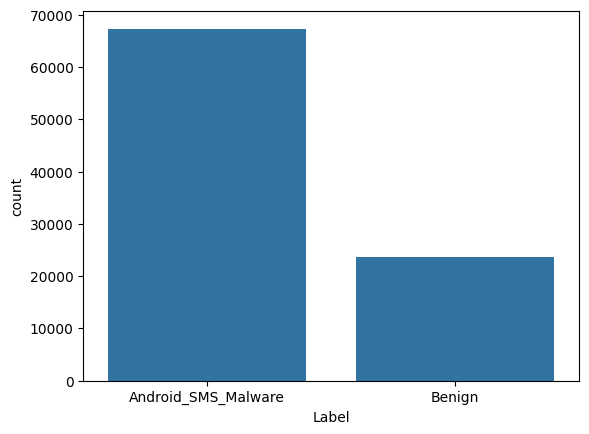

In [14]:
target_counts = data['Label'].value_counts()
# sns.countplot(data, x = 'Label')
print('Class Distribution')
print(target_counts)
sns.countplot(data, x = 'Label')

In [13]:
from category_encoders import TargetEncoder

In [14]:
oversample = SMOTE()
encoder = TargetEncoder()

x = data.drop(['Label'], axis = 1)
y = [data['Label'].unique().tolist().index(i) for i in data['Label']]

x = pd.DataFrame(encoder.fit_transform(x, y), columns = x.columns)

X, y = oversample.fit_resample(x, y)

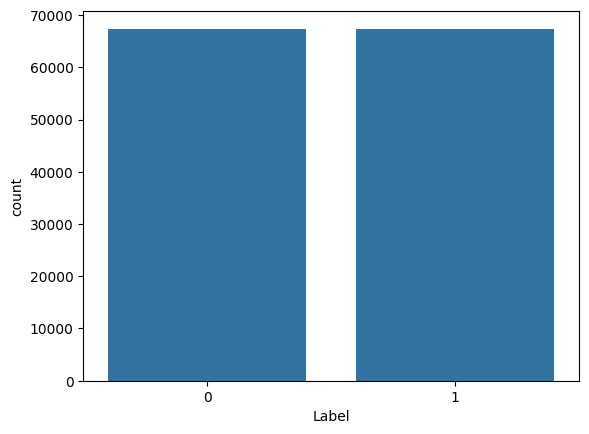

In [15]:
X['Label'] = y
sns.countplot(X, x = 'Label')
data = X

In [19]:
len(data['Flow ID'].unique())

13216

In [20]:
len(data['Source IP'].unique())

17208

In [21]:
len(data['Destination IP'].unique())

25389

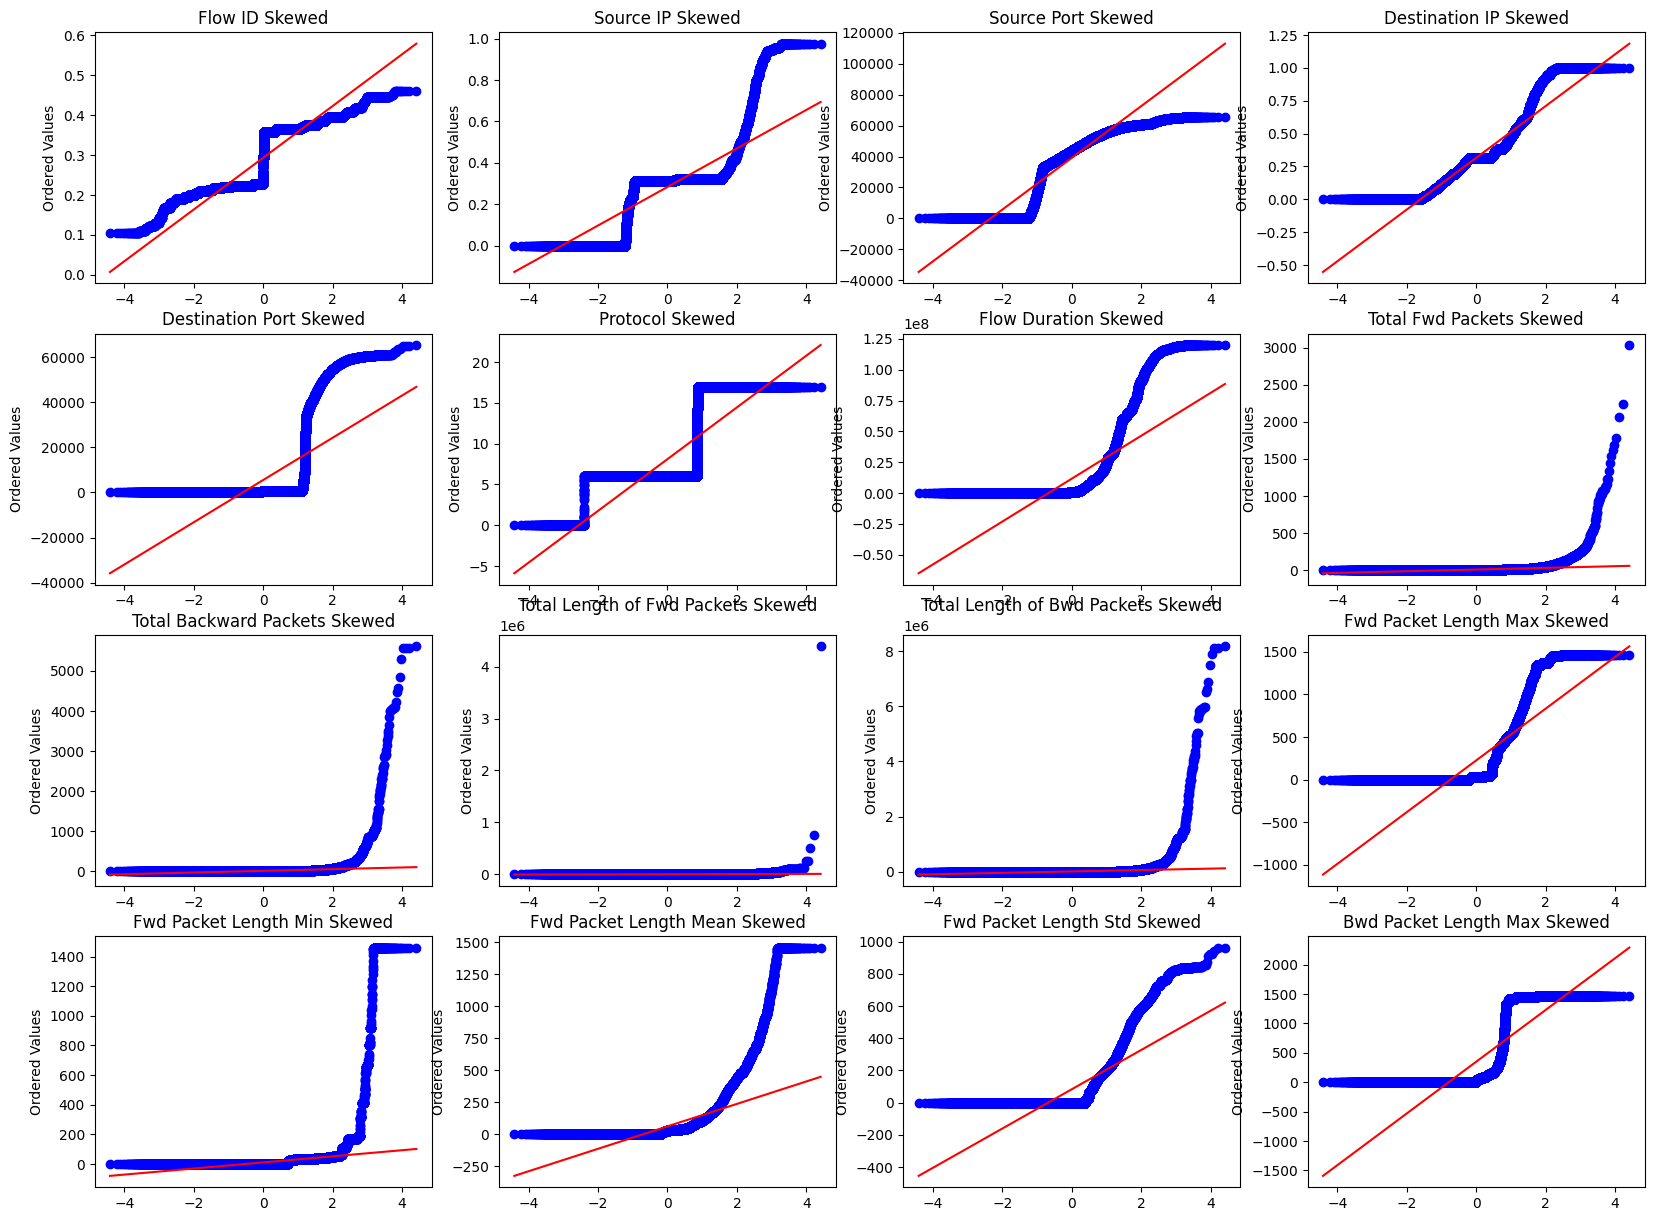

In [22]:
from scipy import stats
fig = plt.figure(figsize = (20, 15))
ax1 = fig.subplots(4, len(data.columns[:16])//4)
for i in range(4):
    for j in range(len(data.columns[:16])//4):
        prob = stats.probplot(data[data.columns[i * 4 + j]],dist=stats.norm, plot=ax1[i][j])
        ax1[i][j].set_xlabel('')
        ax1[i][j].set_title(f'{data.columns[i * 4 + j]} Skewed')
plt.show()

Skewness for Features:
Flow ID              0.031089
Source IP           -0.493095
Source Port         -1.084626
Destination IP       1.085043
Destination Port     2.603444
                      ...    
Active Min           9.892340
Idle Mean            3.994858
Idle Std            12.096112
Idle Max             3.790552
Idle Min             4.213124
Length: 71, dtype: float64


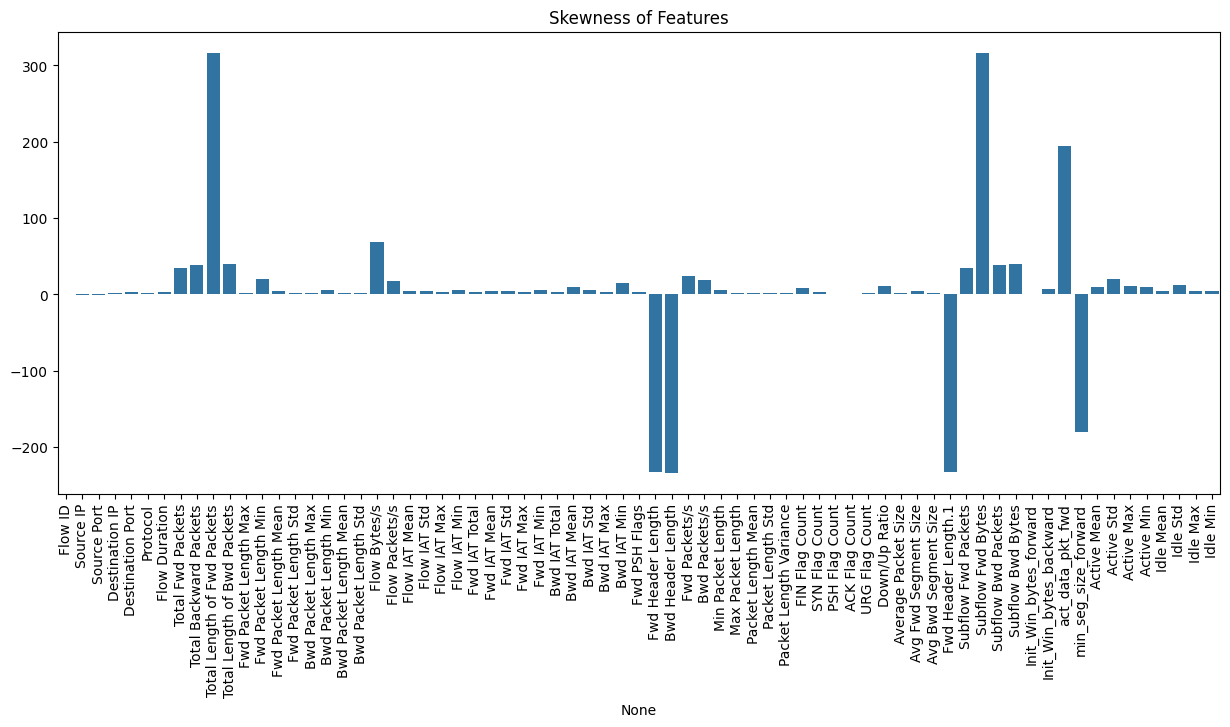

In [23]:
# Calculate skewness for each feature
skewness = data.drop("Label", axis=1).skew()
print("Skewness for Features:")
print(skewness)
s_skewness = sorted(skewness)
# Visualize the skewness of features
plt.figure(figsize=(15, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title("Skewness of Features")
plt.xticks(rotation=90)
plt.show()

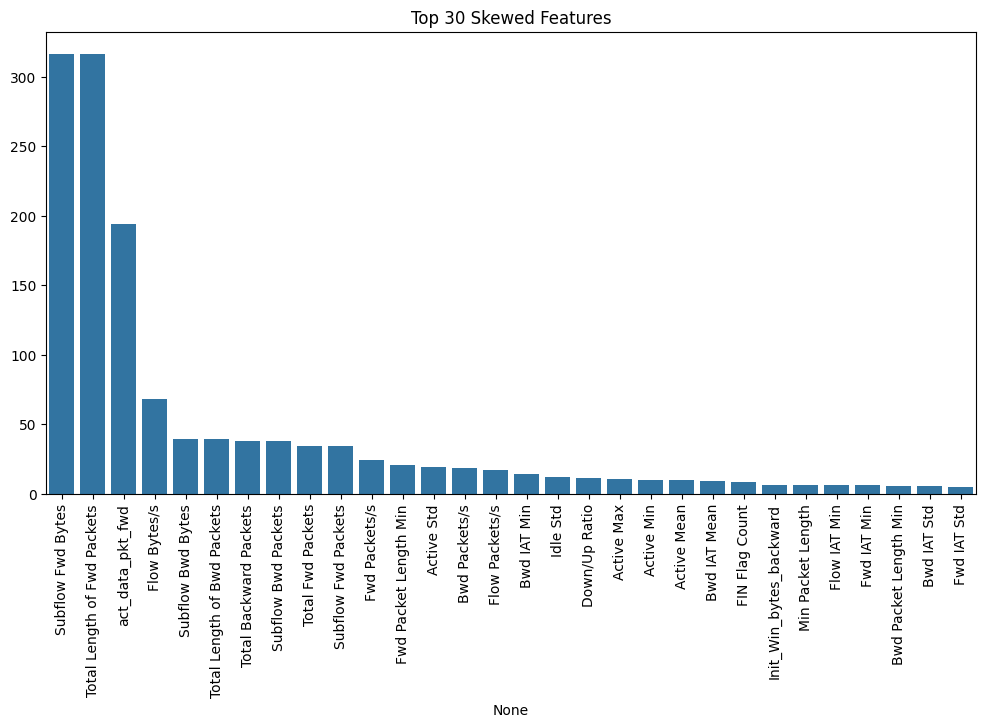

In [24]:
sorted_skewness = skewness.sort_values(ascending=False)

# Choose the top N features to plot
top_features_to_plot = 30  # Adjust as needed

# Plot the skewness of the top features
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_skewness.index[:top_features_to_plot], y=sorted_skewness.values[:top_features_to_plot])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

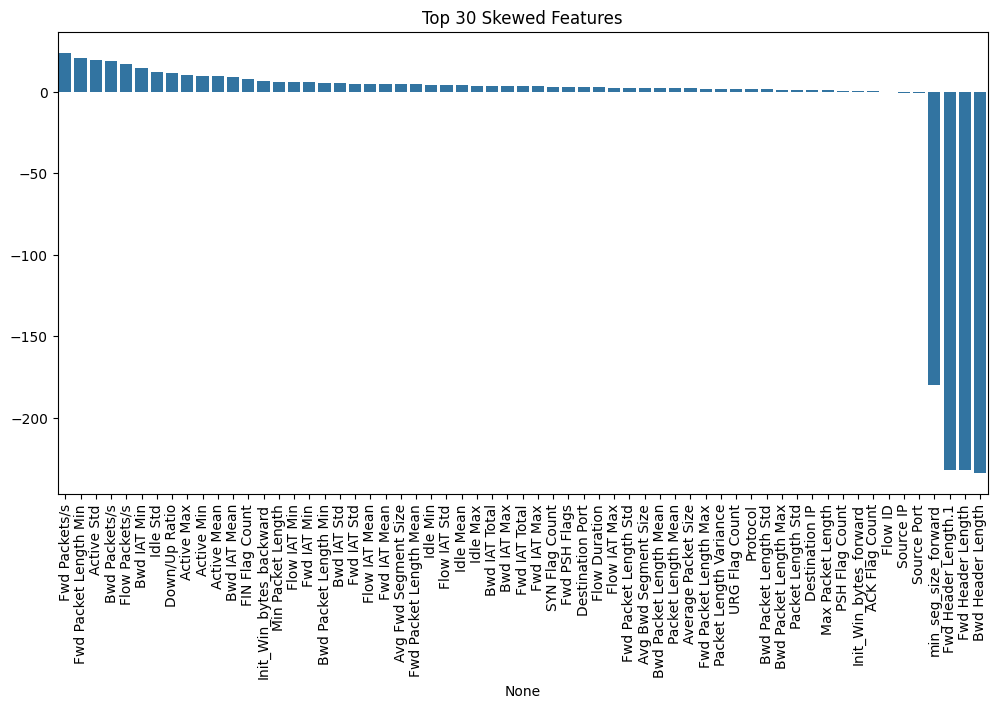

In [25]:
plt.figure(figsize=(12, 6))
last_10 = 10
sns.barplot(x=sorted_skewness.index[last_10:], y=sorted_skewness.values[last_10:])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
X = data.drop(['Label'], axis = 1)
y = [data['Label'].unique().tolist().index(i) for i in data['Label']]

In [24]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, VarianceThreshold

'''def generate_X_y():
    num_rows = 100  # Number of rows
    num_cols = 80   # Number of columns
    # Generate a DataFrame with random 1s and 0s
    data = np.random.randint(2, size=(num_rows, num_cols))  # Random integers (0 or 1)
    columns = [f"Feature_{i+1}" for i in range(num_cols)]  # Column names: Feature_1, Feature_2, ...
    X = pd.DataFrame(data, columns=columns)  # Create DataFrame
    y = [random.randint(0, 1) for _ in range(num_rows)]
    return X, y'''

# X = data.drop(['Label'], axis = 1)
# y = [data['Label'].unique().tolist().index(i) for i in data['Label']]

def _get_score_of_features_set(X, y):
    clf = DecisionTreeClassifier()
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    scores_mean = np.mean(scores)
    return scores_mean

def random_search(X, y, all_features, max_iteration):
    best_features = []
    best_score = 0
    for i in range(max_iteration):
        print(f"[RS] iteration{i}")
        random_features = random.sample(all_features, k=random.randint(len(all_features)//15, len(all_features))) # can change the range of this number
        score = _get_score_of_features_set(X[random_features], y)
        if score > best_score:
            best_score = score
            best_features = random_features
    return best_features

def _get_neighbor_status_for_sa(feature_list, all_features):
    features = feature_list
    # randomly add/remove one feature to/from the list
    choice = random.choice([0, 1])
    if len(feature_list) == 1:
        # cannot have an empty list
        choice = 1
    if choice == 1:
        flag = True
        while flag:
            new_feature = random.choice(all_features)
            if new_feature not in feature_list:
                features.append(new_feature)
                flag = False
    else:
        random_index = random.randrange(len(feature_list))
        features = feature_list.pop(random_index)
    return feature_list

def simulated_annealing(X, y, all_features, initial_temperature, min_temperature, cooling_rate, max_iteration):
    best_features = []
    best_score = 0
    temperature = initial_temperature

    current_features = random.sample(all_features, k=len(all_features)//15) 
    current_score = _get_score_of_features_set(X[current_features], y)

    while temperature > min_temperature:
        print(f"[SA] Current temperature: {temperature}")
        for i in range(max_iteration):
            new_features = _get_neighbor_status_for_sa(current_features, all_features)
            new_score = _get_score_of_features_set(X[new_features], y)

            if new_score > current_score:
                current_features = new_features
                if new_score > best_score:
                    best_features = new_features
            else:
                probability = math.exp((current_score - best_score) / temperature) # metropolis criterion
                if random.random() < probability:
                    current_features = new_features

        temperature = temperature * cooling_rate
            
    return best_features



def _generate_initial_population(all_features, population_size):
    print("Generating initial population")
    if population_size < 2:
        print("[Genetic search] Population size should be higher than 2.")
        return
    
    population = []
    for i in range(population_size):
        population.append(random.sample(all_features, k=random.randint(len(all_features)//15, len(all_features)))) # can change the range of this number
    return population

def _crossover(parent1, parent2):
    max_length = max(len(parent1), len(parent2))
    crossover_index = random.randint(0, max_length-1)
    # sort the lists
    sorted_parents = sorted([parent1, parent2], key = len)
    if crossover_index < len(sorted_parents[0]):
        child1 = sorted_parents[0][:crossover_index] + sorted_parents[1][crossover_index:]
        child2 = sorted_parents[1][:crossover_index] + sorted_parents[0][crossover_index:]
    else:
        child1 = sorted_parents[0] + sorted_parents[1][crossover_index:]
        child2 = sorted_parents[1][:crossover_index]
    return child1, child2

def _sort_population(population):
    sorted_population_descending = sorted(population, key=lambda x: x['score'], reverse=True)
    parent1_index = crossover_index = random.randint(0, len(sorted_population_descending)//2)
    repeat = True
    while repeat:
        parent2_index = crossover_index = random.randint(0, len(sorted_population_descending)//2)
        if parent2_index != parent1_index:
            repeat = False
    return sorted_population_descending
    


def genetic_search(X, y, all_features, population_size, generations, mutation_rate):
    population_features = _generate_initial_population(all_features, population_size)
    population = []
    for features in population_features:
        population.append({'features': features, 'score': _get_score_of_features_set(X[features], y)})


    for generation in range(generations):
        print(f"[GS] Generation #{generation}")
        # sort the candidates in the population
        population = _sort_population(population)

        # crossover
        for i in range(0, population_size//2, 2):
            child1, child2 = _crossover(population[i]['features'], population[i+1]['features'])

            # mutation
            for child in [child1, child2]:
                if random.random() < mutation_rate:
                    child = _get_neighbor_status_for_sa(child, all_features) # randomly remove/add one feature

            population = population[:-2] # drop the two feature lists with the worst performance
            population.append({'features': child1, 'score': _get_score_of_features_set(X[child1], y)})
            population.append({'features': child2, 'score': _get_score_of_features_set(X[child2], y)})

        print(population[0]['features'])
        print(population[0]['score'])
        # print(population[-1]['features'])
        # print(population[-1]['score'])
        
    best_features = population[0]['features']
    return best_features


print(X)









         Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0       0.223321   0.324066        35131        0.185014        443.000000   
1       0.223321   0.185014          443        0.379627      35131.000000   
2       0.223321   0.324066        54930        0.155800        443.000000   
3       0.223321   0.208757          443        0.379627      54930.000000   
4       0.223321   0.324066        53215        0.290124        443.000000   
...          ...        ...          ...             ...               ...   
134783  0.365172   0.323110        35562        0.575822         80.000000   
134784  0.374504   0.312030        50192        0.356819        443.000000   
134785  0.365172   0.929739          443        0.379627      36346.660394   
134786  0.365172   0.325638          443        0.331538      43442.634389   
134787  0.370012   0.310113        57358        0.557402        443.000000   

        Protocol  Flow Duration  Total Fwd Packets  Total Backw

In [18]:
all_features = X.columns.tolist()
print(all_features)
selected_features_rs = random_search(X, y, all_features, 200)
print(f"[RS] {selected_features_rs}")

['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet 

/opt/anaconda3/envs/kafka/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[RS] iteration70
[RS] iteration71
[RS] iteration72
[RS] iteration73
[RS] iteration74
[RS] iteration75
[RS] iteration76
[RS] iteration77
[RS] iteration78
[RS] iteration79
[RS] iteration80
[RS] iteration81
[RS] iteration82
[RS] iteration83
[RS] iteration84
[RS] iteration85
[RS] iteration86


/opt/anaconda3/envs/kafka/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[RS] iteration87
[RS] iteration88
[RS] iteration89
[RS] iteration90
[RS] iteration91
[RS] iteration92
[RS] iteration93
[RS] iteration94
[RS] iteration95
[RS] iteration96
[RS] iteration97
[RS] iteration98
[RS] iteration99
[RS] iteration100
[RS] iteration101
[RS] iteration102
[RS] iteration103
[RS] iteration104
[RS] iteration105
[RS] iteration106
[RS] iteration107
[RS] iteration108
[RS] iteration109
[RS] iteration110
[RS] iteration111
[RS] iteration112
[RS] iteration113
[RS] iteration114
[RS] iteration115
[RS] iteration116
[RS] iteration117
[RS] iteration118
[RS] iteration119
[RS] iteration120
[RS] iteration121
[RS] iteration122
[RS] iteration123
[RS] iteration124
[RS] iteration125
[RS] iteration126
[RS] iteration127
[RS] iteration128
[RS] iteration129
[RS] iteration130
[RS] iteration131
[RS] iteration132
[RS] iteration133
[RS] iteration134
[RS] iteration135
[RS] iteration136
[RS] iteration137
[RS] iteration138
[RS] iteration139
[RS] iteration140
[RS] iteration141
[RS] iteration142
[RS] 

In [111]:
selected_features_sa =  simulated_annealing(X, y, all_features, 500, 50, 0.8, 30)
print(f"[SA] {selected_features_sa}")

[SA] Current temperature: 500
[SA] Current temperature: 400.0


/opt/anaconda3/envs/kafka/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[SA] Current temperature: 320.0
[SA] Current temperature: 256.0
[SA] Current temperature: 204.8
[SA] Current temperature: 163.84000000000003


/opt/anaconda3/envs/kafka/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[SA] Current temperature: 131.07200000000003
[SA] Current temperature: 104.85760000000003
[SA] Current temperature: 83.88608000000004
[SA] Current temperature: 67.10886400000003
[SA] Current temperature: 53.687091200000026
[GS] ['Fwd Packets/s', 'Active Std', 'Bwd IAT Max', 'Bwd Packet Length Std', 'Idle Max', 'Bwd Packet Length Min', 'Fwd IAT Max', 'Flow IAT Std', 'Bwd IAT Total', 'Protocol', 'Flow IAT Max', 'Source Port', 'Flow Bytes/s', 'Total Length of Bwd Packets', 'Total Backward Packets', 'Flow IAT Mean', 'act_data_pkt_fwd', 'Packet Length Std', 'Total Fwd Packets', 'Fwd IAT Min', 'Idle Mean', 'PSH Flag Count', 'Fwd Packet Length Min', 'Average Packet Size']


In [ ]:
selected_features_gs = genetic_search(X, y, all_features, 30, 100, 0.5)
print(f"[GS] {selected_features_gs}")

common_elements = set(selected_features_rs).intersection(selected_features_sa, selected_features_gs)
common_elements_list = list(common_elements)
print(f"Features selected by heuristic search algorithms: {common_elements_list}")

In [ ]:
from sklearn.feature_selection import f_classif

# Use SelectPercentile for feature selection
selector = SelectPercentile(f_classif, percentile=15)
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices].tolist()
print(f"Features selected by SelectPercentile: {selected_features}")

Features selected by SelectPercentile: ['Flow ID', 'Source IP', 'Destination IP', 'Flow Duration', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Avg Fwd Segment Size']


## DL - Akshat

In [21]:
list1= ['Fwd Packets/s', 'Active Std', 'Bwd IAT Max', 'Bwd Packet Length Std', 'Idle Max', 'Bwd Packet Length Min', 'Fwd IAT Max', 'Flow IAT Std', 'Bwd IAT Total', 'Protocol', 'Flow IAT Max', 'Source Port', 'Flow Bytes/s', 'Total Length of Bwd Packets', 'Total Backward Packets', 'Flow IAT Mean', 'act_data_pkt_fwd', 'Packet Length Std', 'Total Fwd Packets', 'Fwd IAT Min', 'Idle Mean', 'PSH Flag Count', 'Fwd Packet Length Min', 'Average Packet Size']
list2 = ['Avg Bwd Segment Size', 'Average Packet Size', 'Subflow Fwd Packets', 'Flow Bytes/s', 'Fwd IAT Min', 'URG Flag Count', 'Flow Duration', 'Packet Length Mean', 'Active Mean', 'Fwd IAT Std', 'Flow Packets/s', 'Flow IAT Max', 'Bwd Packet Length Min', 'Flow ID', 'Bwd IAT Mean', 'Idle Min', 'Bwd Packet Length Mean', 'Fwd Packet Length Max', 'min_seg_size_forward']
list3 = ['ACK Flag Count', 'Fwd IAT Mean', 'Subflow Fwd Bytes', 'Flow IAT Std', 'Total Backward Packets', 'Flow Duration', 'Idle Mean', 'Destination Port', 'Bwd IAT Max', 'SYN Flag Count', 'Flow ID', 'min_seg_size_forward', 'Bwd IAT Total']

common_items = list(set(list2) & set(list3))
print(common_items)

['Flow Duration', 'min_seg_size_forward', 'Flow ID']
